<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. 


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Implementing a Function that Makes a Graph</li>
        <li>Using yfinance to Extract Stock Data</li>
        <li>Using Webscraping to Extract Tesla Revenue Data</li>
        <li>Using yfinance to Extract Stock Data</li>
        <li>Using Webscraping to Extract GME Revenue Data</li>
        <li>Plotting Tesla Stock Graph</li>
        <li>Plotting GameStop Stock Graph</li>
    </ul>
</div>

<hr>


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 122.7 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 184.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 172.9 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=0da9461c3cf03173bdcc987fcb9ccdc6ba12f6316605b94c4747c3bb399efb80
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-linux_x86_64.whl size=303891 sha256=7adfcdde894025154c2080819637d7955dda2bb311fadc31bde2e4674590677b
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/e2/4

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. *

In [3]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.



import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

## Using yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
tesla = yf.Ticker('TSLA')


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [5]:
tesla_data = tesla.history(period="max")

Resetting the index using the `reset_index(inplace=True)` function on the tesla_data DataFrame.


In [6]:
tesla_data.reset_index(inplace=True)

## Using Webscraping to Extract Tesla Revenue Data


In [ ]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(URL)

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [ ]:
soup = BeautifulSoup(html_data.text, 'html.parser')
tables = soup.find_all('table')
tables[1]

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744<

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [ ]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for i, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = i
        break

print("Index: ",i)
for row in tables[table_index].tbody.find_all('tr'):
    cols = row.find_all('td')
    if cols:
        date = cols[0].text.strip()
        revenu = cols[1].text.strip()

        df_row = pd.DataFrame({"Date": [date], "Revenue":[revenu]})
        tesla_revenue = pd.concat([tesla_revenue, df_row], ignore_index = True)

tesla_revenue.head(5)

Index:  1


,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Removing the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Removing null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Displaying the last 5 row of the `tesla_revenue` dataframe using the `tail` function. 

In [ ]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Using yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [43]:
gme = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [44]:
gme_data = gme.history(period="max")

Resetting the index using the `reset_index(inplace=True)` function on the gme_data DataFrame.


In [45]:
gme_data.reset_index(inplace=True)

## Using Webscraping to Extract GME Revenue Data


In [47]:
URL = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(URL)

Parsing the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [48]:
soup = BeautifulSoup(html_data_2.text, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. 


In [51]:
gme_tables = soup.find_all('table')

for i, table in enumerate(gme_tables):
    if("GameStop Quarterly Revenue" in str(table)):
        gme_rev_index = i
        break
        
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in gme_tables[gme_rev_index].tbody.find_all('tr'):
    cols = row.find_all('td')
    if cols:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()

        revenue_row = pd.DataFrame({"Date":[date], "Revenue":[revenue]})

        gme_revenue = pd.concat([gme_revenue, revenue_row], ignore_index=True)

gme_revenue.head(5)
        

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


Removing the comma and dollar sign, an null or empty strings from the Revenue column.


In [53]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)

Last five rows of the `gme_revenue` dataframe.

In [56]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Generating Tesla Stock Graph


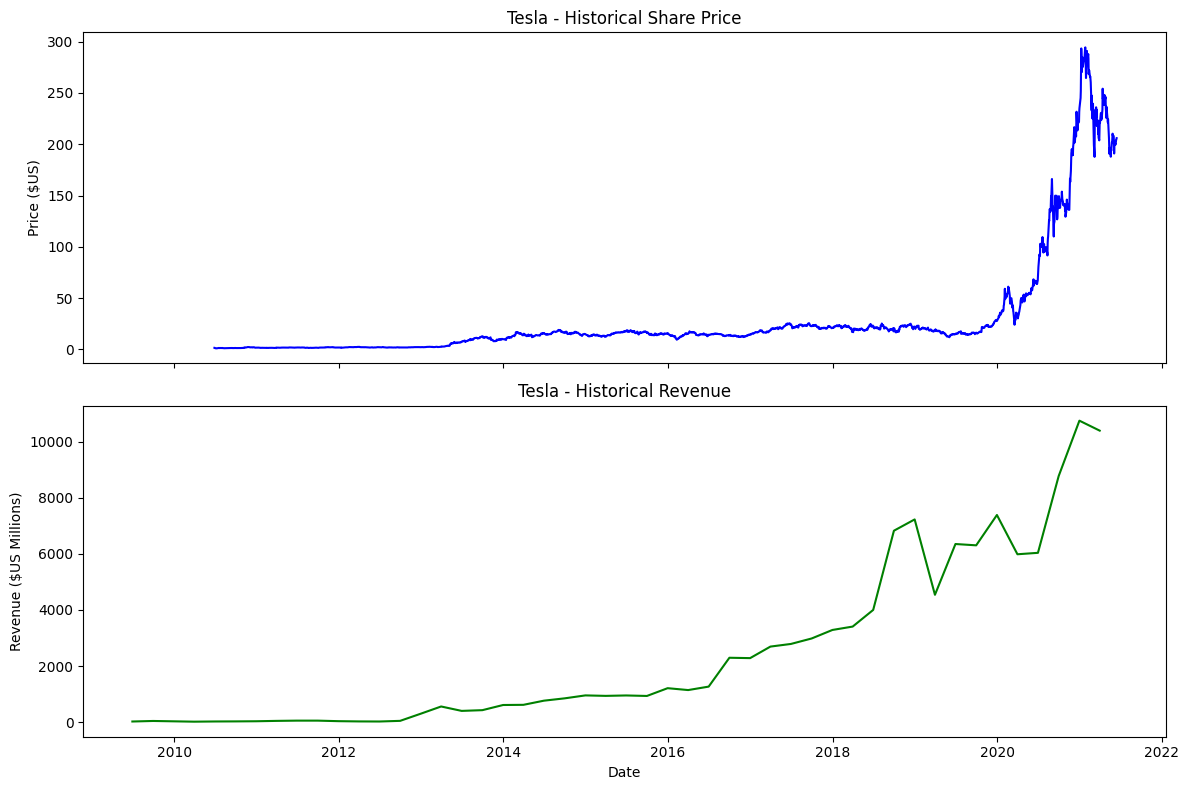

In [57]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Generating GameStop Stock Graph


We use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. 


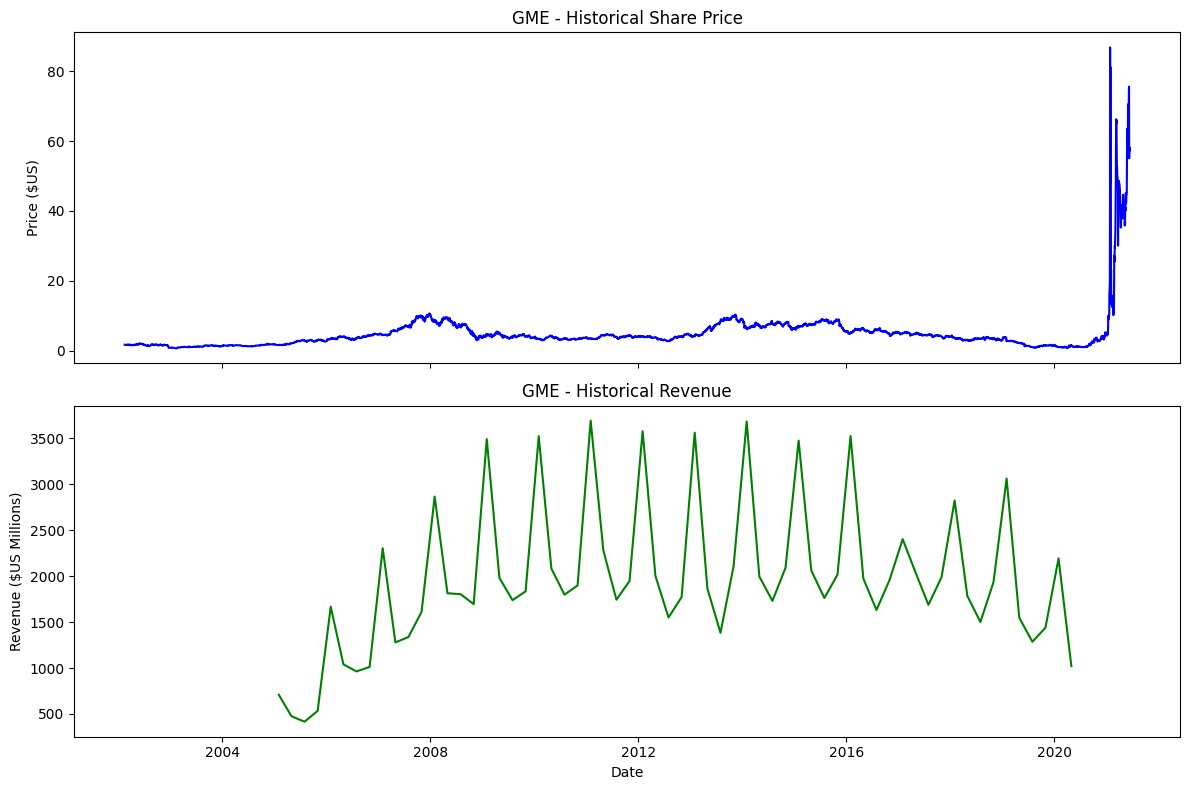

In [58]:
make_graph(gme_data, gme_revenue, 'GME')

<h2>Authors:</h2> 

<a href="https://www.linkedin.com/in/cpagoui/">Pagoui Lagabka Constant</a> 

